# Web_Scraping
IT Academy T10.1

# Objectius
  Web scraping.
  Documentar dades recollides amb web scraping.

# Exercici 1
Realitza web scraping de dues de les tres pàgines web proposades utilitzant BeautifulSoup primer i Selenium després. 

- http://quotes.toscrape.com

- https://www.bolsamadrid.es

- www.wikipedia.es (fes alguna cerca primer i escrapeja algun contingut)




De cada web, s'scrappejaran els diferents elements. Per exemple, en

http://quotes.toscrape.com

S'extreuran la cita, el nom de l'autor/a, i les etiquetes (en vermell, a sota).

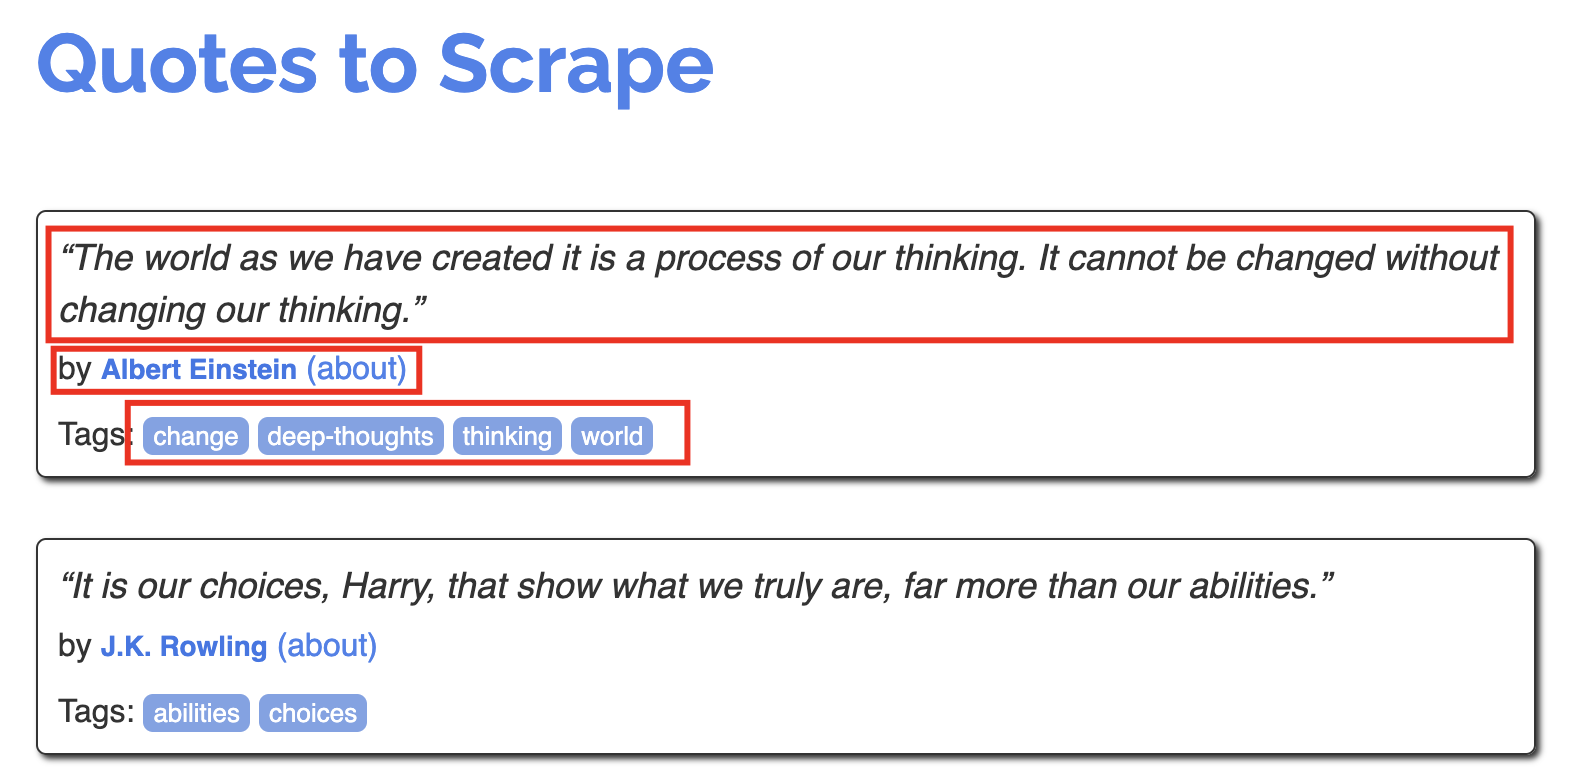

In [2]:
# Llibreries comuns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Web scrapping amb BeautifulSoup

In [17]:
import requests
from bs4 import BeautifulSoup

In [18]:
# Petició d'URL
url = 'http://quotes.toscrape.com'
response = requests.get(url)

# LLista buida per guardar les quotes
quotes_list = []

if response.status_code == 200:
    # Parsejem el contingut de la pàgina amb BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Inicialitzem la variable per trobar els divs que tenen la classe 'quote'
    quote_elements = soup.find_all('div', class_='quote')

    # Recorre cada entrada i extreu citació, autor i etiquetes
    for quote_element in quote_elements:
        quote_text = quote_element.find('span', class_='text').text.strip()
        author_name = quote_element.find('small', class_='author').text.strip()
        tags_container = quote_element.find('div', class_='tags')
        tags = [tag.text.strip() for tag in tags_container.find_all('a', class_='tag')]
        
        # Emmagatzema les dades en un diccionari
        quote_data = {
            'Cita': quote_text,
            'Autor': author_name,
            'Etiquetes': tags
        }
        
        # Afegeix el diccionari a la llista
        quotes_list.append(quote_data)
else:
    print("No s'ha pogut carregar la pàgina:", response.status_code)

# Imprimeix la llista de citacions
for idx, quote_data in enumerate(quotes_list, start=1):
    print(f"Cita {idx}:")
    print("Cita:", quote_data['Cita'])
    print("Autor:", quote_data['Autor'])
    print("Etiquetes:", quote_data['Etiquetes'])
    print()

Cita 1:
Cita: “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Autor: Albert Einstein
Etiquetes: ['change', 'deep-thoughts', 'thinking', 'world']

Cita 2:
Cita: “It is our choices, Harry, that show what we truly are, far more than our abilities.”
Autor: J.K. Rowling
Etiquetes: ['abilities', 'choices']

Cita 3:
Cita: “There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Autor: Albert Einstein
Etiquetes: ['inspirational', 'life', 'live', 'miracle', 'miracles']

Cita 4:
Cita: “The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Autor: Jane Austen
Etiquetes: ['aliteracy', 'books', 'classic', 'humor']

Cita 5:
Cita: “Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Autor: Marilyn Monroe
Etiquetes: ['be-yourself', 'inspirational']

Cita 

## Web scrapping amb BeautifulSoup

A continuació s'scrappejarà la pàgina web de la Wikipèdia sobre el Parc Natural del Massís del Montgó (https://es.wikipedia.org/wiki/Parque_natural_del_Macizo_del_Montg%C3%B3) fent servir el Beautiful Soup, buscant l'etiqueta \<p\> per extreure'n la informació rellevant.

In [27]:
import requests
from bs4 import BeautifulSoup

url = "https://es.wikipedia.org/wiki/Parque_natural_del_Macizo_del_Montg%C3%B3"

# Sol·licitud de informació
response = requests.get(url)

# Verificació de la resposta
if response.status_code == 200:
    # Parsea el contenido HTML de la página
    soup = BeautifulSoup(response.text, "html.parser")
    
    # Cerca del títol
    title = soup.find("h1", {"id": "firstHeading"})
    
    if title:
        print("Títol de la pàgina:", title.text)
    else:
        print("No s'ha trobat el títol de la pàgina en català.")
    
    # Cerca del text principal
    text_principal = soup.find('div', {'id': 'mw-content-text'})

    # Cerca de paràgrafs amb l'etiqueta <p>
    parts_text = text_principal.find_all('p')

    for part in parts_text:
        print(part.get_text())
else:
    print("Error en accedir a la pàgina. Codi d'estat:", response.status_code)


Títol de la pàgina: Parque natural del Macizo del Montgó
El parque natural del Macizo del Montgó (en valenciano parc natural del Massís del Montgó) es un espacio natural protegido español situado en el noreste de la provincia de Alicante, Comunidad Valenciana, que protege el macizo del mismo nombre, cuya máxima altitud es de 753 m.[1]​

Este paraje de 2117,68 hectáreas, que fue declarado parque natural por el gobierno valenciano el 16 de marzo de 1987, se encuentra en la comarca de la Marina Alta, al norte de la provincia de Alicante.

En el año 2002, se aprueba el Plan de Ordenación de los recursos Naturales (PORN), que regula la condición de hacer un desarrollo sostenible en una superficie de 7500 hectáreas. El PORN propone la creación de un perímetro de amortiguación de impactos, con el objetivo de evitar el aislamiento biológico del macizo. En ese mismo año, se crea la figura de reserva de los fondos marinos del Cabo de San Antonio, que protege los fondos de Posidonia oceánica y lo

###  Tipus de resposta d'status

    # Sol·licitud de informació
    response = requests.get(url)

Aquesta petició pot tornar els següents codis d'status:

<strong>200 OK:</strong> Aquesta resposta indica que la petició ha estat satisfactòria i que el servidor ha retornat les dades sol·licitades. És la resposta estàndard quan una sol·licitud HTTP ha tingut èxit.

<strong>201 Created:</strong> Aquesta resposta s'utilitza quan una nova entitat ha estat creada amb èxit. Per exemple, quan es crea una nova entrada en una base de dades.

<strong>204 No Content:</strong> Aquesta resposta indica que la sol·licitud s'ha processat amb èxit, però no hi ha contingut per retornar. És comú utilitzar-ho en respostes a peticions AJAX que no requereixen una resposta completa.

<strong>400 Bad Request:</strong> Aquesta resposta indica que la petició és incorrecta o mal formada. Pot ser a causa d'arguments faltants o invàlids en la petició.

<strong>401 Unauthorized:</strong> Aquesta resposta indica que l'usuari no està autoritzat per accedir a la pàgina o recurs sol·licitat. Normalment, requereix autenticació.

<strong>403 Forbidden:</strong> Similar a 401, però en aquest cas, fins i tot amb autenticació, l'usuari no té permís per accedir al recurs sol·licitat.

<strong>404 Not Found:</strong> Aquesta resposta indica que el recurs sol·licitat no es troba en el servidor. És el que veus quan intentes accedir a una pàgina que no existeix.

<strong>500 Internal Server Error:</strong> Aquesta resposta indica que hi ha un error en el servidor que impedeix processar la sol·licitud. És un error general en el servidor.

<strong>503 Service Unavailable:</strong> Aquesta resposta indica que el servidor no està disponible temporalment, potser degut a una sobrecàrrega o manteniment.

Ara, busquem les seccions (h2, h3, etc.) al codi

In [16]:
titols_scrap = soup.find_all(['h2', 'h3', 'h4', 'h5', 'h6'])

for titol in titols_scrap:
    print(titol.text.replace("[modifica]", ""))
    print()


Contenidos

Geografía[editar]

Municipios comprendidos[editar]

Orografía[editar]

Clima[editar]

Flora[editar]

Fauna[editar]

Cultura[editar]

Accesos[editar]

Véase también[editar]

Referencias[editar]

Enlaces externos[editar]



# Exercici 2
Documenta en un Word el teu conjunt de dades generat amb la informació que tenen els diferents arxius de Kaggle.

Afegit a la carpeta de GitHub

# Exercici 3
Tria una pàgina web que tu vulguis i realitza web scraping.

In [26]:
# URL de eldiario.es
url = "https://www.eldiario.es/"
response = requests.get(url)

# Instanciar l'objecte BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")

# Trobar tots els elements <a> que contenen els títols de les notícies
news_titles = soup.find_all("h2", class_="ni-title")

# Imprimir a la pantalla
for title in news_titles:
    print(title.get_text(strip=True))


Puigdemont ralentiza la investidura de Sánchez y aprieta para una amnistía más amplia
Castilla y León llevará ante la justicia los pactos del PSOE mientras Mañueco permite insultos de Vox a los socialistas
Esperanza Aguirre anima a decenas de personas a cortar el tráfico en una protesta en Ferraz
Podemos aprueba un cambio de estrategia para distanciarse de Sumar
Ofensiva de la Guardia Civil y la Audiencia Nacional en las causas del procés
Condonar deudas a todos, Rodalies para Catalunya y rebajar peajes en Galicia: los pactos de investidura por territorios
La última zancadilla a la ley de amnistía
¿Por qué Egipto se resiste a abrir su frontera con Gaza para que salgan los palestinos?
Al menos 17 muertos en un ataque contra una escuela de la UNRWA en el campo de refugiados de Yabalia
La falta de agua potable para el 95% de la población de Gaza amenaza con provocar una crisis sanitaria
El equipo de fútbol alemán Mainz despide a El Ghazi, uno de sus jugadores, por su apoyo a Palestina
El 